# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import seaborn as sns
import requests
import datetime
from datetime import date,timedelta

# Pre-processing data

In [2]:
day = '06-02-2024'
day2 = '06022024'
today = datetime.date(2024,2,6)

In [3]:
data = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\dades_sivic_' + day2 + '.xlsx')

In [4]:
datss = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\microbiologia_sivic.xlsx', sheet_name = 'Full2')

In [5]:
data.head()

,data,diagnostic,sexe,grup_edat,casos
0,2021-12-29,COVID-19,Dona,45 a 49,1605
1,2021-05-23,ILI,Dona,40 a 44,30
2,2022-07-11,ILI,Dona,40 a 44,141
3,2015-06-16,ILI,Dona,30 a 34,123
4,2020-10-24,ILI,Dona,30 a 34,32


In [6]:
datss.head()

,data,MITJANAC19,CILC19,CIHC19,MITJANAG,CILG,CIHG,MITJANAV,CILV,CIHV
0,2022-10-03,70,51,88,32,19,45,9,2,16
1,2022-10-10,73,53,93,36,22,51,13,4,22
2,2022-10-17,82,62,102,29,17,42,19,9,29
3,2022-10-24,82,62,101,40,26,54,33,20,46
4,2022-10-31,85,61,109,37,21,54,77,54,100


In [7]:
data['data'] =  pd.to_datetime(data['data'], dayfirst=False, format = "%Y-%m-%d")

In [8]:
poblacio2012 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = '2012')
poblacio2019 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = '2019')
poblacio2020 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = '2020')

In [9]:
sarscov2 = data[data.diagnostic == 'COVID-19']
bronquiolitis = data[data.diagnostic == 'Bronquiolitis']
influenza = data[data.diagnostic == 'Grip']

sarscov2.sort_values(by=['data'], ascending=True, inplace=True)
influenza.sort_values(by=['data'], ascending=True, inplace=True)
bronquiolitis.sort_values(by=['data'], ascending=True, inplace=True)

C:\Users\A. Perramon Malavez\AppData\Local\Temp\ipykernel_20392\709485397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarscov2.sort_values(by=['data'], ascending=True, inplace=True)
C:\Users\A. Perramon Malavez\AppData\Local\Temp\ipykernel_20392\709485397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  influenza.sort_values(by=['data'], ascending=True, inplace=True)
C:\Users\A. Perramon Malavez\AppData\Local\Temp\ipykernel_20392\709485397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [10]:
sarscov2.head()

,data,diagnostic,sexe,grup_edat,casos
326656,2019-12-01,COVID-19,Dona,40 a 44,1
227924,2019-12-01,COVID-19,Home,40 a 44,1
257276,2019-12-02,COVID-19,Home,20 a 24,1
303819,2019-12-02,COVID-19,Dona,35 a 39,1
371870,2019-12-03,COVID-19,Dona,60 a 64,1


In [11]:
influenza.head()

,data,diagnostic,sexe,grup_edat,casos
90966,2011-09-01,Grip,Home,70 a 74,1
45298,2011-09-01,Grip,Home,25 a 29,2
282769,2011-09-01,Grip,Dona,45 a 49,1
302747,2011-09-01,Grip,Dona,25 a 29,2
21228,2011-09-01,Grip,Dona,35 a 39,1


In [12]:
bronquiolitis.head()

,data,diagnostic,sexe,grup_edat,casos
372590,2011-09-01,Bronquiolitis,Home,80 o més,1
258499,2011-09-01,Bronquiolitis,Home,1 i 2,1
209878,2011-09-01,Bronquiolitis,Dona,55 a 59,1
159866,2011-09-01,Bronquiolitis,Dona,50 a 54,2
252405,2011-09-01,Bronquiolitis,Home,0,6


In [13]:

def preprocess_SIVIC_report(dataframe, weights):
    # Only valid for SIVIC data, if other data, change variable names
    df_adapted = dataframe[['data','casos']]
    df_adapted.index = pd.DatetimeIndex(df_adapted.data).floor('D')
    df_adapted = df_adapted[['casos']]
    df_adapted = df_adapted.resample('D').sum()

    day = df_adapted.index.max()
    start_day = day - timedelta(days=29)
    dates = pd.date_range(start=start_day, end=day)

    for i in range(len(dates)):
        df_adapted.loc[dates[i], 'casos'] /= weights[i]

    df_adapted = df_adapted[['casos']]
    return df_adapted

In [14]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, Easter, Day
from pandas.tseries.offsets import CustomBusinessDay

def adjust_daily_values(df, weights, N):
# We create a Calendar of Catalan non-laboral days, since we are dealing with catalan data.
    class CatCalendar(AbstractHolidayCalendar):
        rules = [
         Holiday('Any Nou', month=1, day=1),
         Holiday('Reis', month=1, day=6),
         Holiday('Divendres SS', month=1, day=1, offset=[Easter(), Day(-2)]),
         Holiday('Dilluns de Pasqua', month=1, day=1, offset=[Easter(), Day(1)]),
         Holiday('Pentecosta', month=1, day=1, offset=[Easter(), Day(49)]),
         Holiday('Dia del Treballador', month=5, day=1),
         Holiday('Sant Joan', month=6, day=24),
         Holiday('Dia Asumpció', month=8, day=15),
         Holiday('Diada', month=9, day=11),
         Holiday('Dia del Pilar', month=10, day=12),
         Holiday('Tots Sants', month=11, day=1),
         Holiday('Dia Constitució', month=12, day=6),
         Holiday('Immaculada Concepció', month=12, day=8), 
         Holiday('Nadal', month=12, day=25),
         Holiday('Sant Esteve', month=12, day=26),
       ]

    cal = CatCalendar()
    holidays = cal.holidays(start=df.index.min(), end=df.index.max())

    conditions = [
        (df.index.isin(holidays) & ~df.index.day_name().isin(['Sunday'])),
        (df.index.day_name().isin(['Monday'])),
        (df.index.day_name().isin(['Tuesday'])),
        (df.index.day_name().isin(['Wednesday'])),
        (df.index.day_name().isin(['Thursday'])),
        (df.index.day_name().isin(['Friday'])),
        (df.index.day_name().isin(['Saturday'])),
        (df.index.day_name().isin(['Sunday']))
        ]

    values = [3, 1, 2, 2, 2, 2, 3, 3] 
    df['Holidays'] = np.select(conditions, values)

    adjusted_values = []

    for cc in range(100):
        each_iteration = [];
        for j in range(len(df)):
            if df['casos'].iloc[j] >= N:
                D1 = np.random.normal(loc=weights[0], scale=1/(df['casos'].iloc[j]))
                D2 = np.random.normal(loc=weights[1], scale=1/df['casos'].iloc[j])
                D3 = np.random.normal(loc=weights[2], scale=1/df['casos'].iloc[j])
                each_iteration.append(df['casos'].iloc[j] / final_weights[df['Holidays'].iloc[j] - 1])
            else:
                D1 = weights[0]
                D2 = weights[1]
                D3 = weights[2]
                each_iteration.append(df['casos'].iloc[j])
                    
            final_weights = np.array([D1, D2, D3]) #, D4, D5, D6, D7, D8])
           
        adjusted_values.append(each_iteration)
        
    real_readjustment = np.mean(adjusted_values,axis = 0)
    
    df_adjusted = pd.DataFrame({'casos': real_readjustment})
    df_adjusted.index = df.index
    return df_adjusted

In [15]:
sivic_influenza_weights = [0.9814808818091225, 0.9804883918512286, 0.9803324147969025, 0.9854552963599792, 0.9873453685537708,
                           0.978808400702492, 0.9788115530955728, 0.978170009620691, 0.9829297606345466, 0.980298579705219,
                           0.9862466616351895, 0.9794968586048378, 0.9864930902165295, 0.9832034016254261, 0.9793077471733056,
                           0.9854412006563175, 0.9828729113887751, 0.9861272883137009, 0.987166374582456, 0.9832571534733368,
                           0.9820208192923188, 0.9827640666400363, 0.9849830454038482, 0.976778817835208, 0.9850580489293299,
                           0.9850218227778669, 0.9839435688514615, 0.9787676694009382, 0.9309607391639738, 0.7742126223504258]

weekly_report_influenza_weights = [1.883294076802321, 1.2304279165409377, 0.27545235025247405]

sivic_bronchiolitis_weights = [0.9239875738879061, 0.9333391299894622, 0.9560568135454917, 0.9917235629662133,
                               0.9853421978127861, 0.997733750980756, 0.9954385964912281, 0.992296918767507,
                               0.9940072998896529, 0.9638733925392448, 1.0051154713979564, 0.9921473483223151,
                               0.9790909403734256, 0.9721812944637795, 0.9788573686383611, 0.9716645952510283,
                               0.9683360099284468, 0.9820950570694816, 0.9741649489530368, 0.9855246903311293,
                               0.9838703912272606, 0.9622308222347808, 0.9922005659781096, 0.9946139187132502,
                               0.9883720271334417, 0.9650727480537634, 0.965990683916946, 0.9588178225179574,
                               0.9216706981822732, 0.763632173650703]

sivic_sarscov2_weights = [0.9597398055879617, 0.969014679916447, 0.9661646150480041, 0.96521755985344, 0.9674278758121507,
                          0.9595788884623111, 0.9576876303476702, 0.9522694764458034, 0.9578820113204162, 0.9657774051599223,
                          0.9670204182975983, 0.9587347883912071, 0.954057391666535, 0.9464043945138676, 0.9422366190603921,
                          0.9505198311978659, 0.9523281281462438, 0.9333891932592314, 0.9279183490802368, 0.9214068730906899,
                          0.9184222060628039, 0.9264175803620267, 0.9254114754643736, 0.915002227544225, 0.92226682337555,
                          0.9139051211377072, 0.9014121034356387, 0.8788044986579228, 0.8206693969716936, 0.6677770520600653]

In [16]:
#sarscov2_tottot = sarscov2[['data','casos']]
#sarscov2_tottot.index = pd.DatetimeIndex(sarscov2_tottot.data).floor('D')
#sarscov2_tottot = sarscov2_tottot['casos'].resample('D').sum()
#sarscov2_tottot = pd.DataFrame(sarscov2_tottot)

# Nowcasting approach
adpted_sivic_covid = preprocess_SIVIC_report(sarscov2, sivic_sarscov2_weights)
# Calculate the rolling mean of the adjusted reported data over a 7-day window
sarscov2_tot = adpted_sivic_covid.rolling(window=7, center=False, min_periods=1).mean()

#sarscov2_tot = sarscov2_tottot.rolling(window=7, center = False, min_periods = 1).mean()

poblacio2019 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2019))
poblacio2020 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2020))

locs = np.where(sarscov2_tot.index.year == 2019)
poptot = poblacio2019.Total.sum()
inc_sarscov2_tot = 1e5*sarscov2_tot.iloc[locs[0][0]].div(poptot, fill_value=0)

for j in locs[0][1:]:
    inc_sarscov2_tot = pd.concat([inc_sarscov2_tot,1e5*sarscov2_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

for yy in np.arange(2020,2025):
    if yy  == 2023 or yy == 2024:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_tot.index.year == yy))
    poptot = poblacio.Total.sum()
    for j in locs[0]:
        inc_sarscov2_tot = pd.concat([inc_sarscov2_tot,1e5*sarscov2_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

inc_sarscov2_tot.index = sarscov2_tot.index

sarscov2_0 = sarscov2[sarscov2.grup_edat == 0]
sarscov2_00 = sarscov2_0[['data','casos']]
sarscov2_12 = sarscov2[sarscov2.grup_edat == '1 i 2']
sarscov2_1212 = sarscov2_12[['data','casos']]
sarscov2_34 = sarscov2[sarscov2.grup_edat == '3 i 4']
sarscov2_3434 = sarscov2_34[['data','casos']]
sarscov2_514 = sarscov2[(sarscov2.grup_edat == '5 a 9') | (sarscov2.grup_edat == '10 a 14')]
sarscov2_514514 = sarscov2_514[['data','casos']]

sarscov2_00.index = pd.DatetimeIndex(sarscov2_00.data).floor('D')
sarscov2_00 = sarscov2_00['casos'].resample('D').sum()
sarscov2_00 = pd.DataFrame(sarscov2_00)

sarscov2_0 = sarscov2_00.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where(sarscov2_0.index.year == 2020)
pop0 = poblacio2020[poblacio2020.Edat == '0'].Total.values[0]
inc_sarscov2_0 = 1e5*sarscov2_0.iloc[locs[0][0]].div(pop0, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_0 = pd.concat([inc_sarscov2_0,1e5*sarscov2_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

for yy in np.arange(2021,2025):
    if yy  == 2023 or yy == 2024:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_0.index.year == yy))
    pop0 = poblacio[poblacio.Edat == '0'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_0 = pd.concat([inc_sarscov2_0,1e5*sarscov2_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

inc_sarscov2_0.index = sarscov2_0.index
        
sarscov2_1212.index = pd.DatetimeIndex(sarscov2_1212.data).floor('D')
sarscov2_1212 = sarscov2_1212['casos'].resample('D').sum()
sarscov2_1212 = pd.DataFrame(sarscov2_1212)

sarscov2_12 = sarscov2_1212.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where(sarscov2_12.index.year == 2019)
pop12 = poblacio2019[poblacio2019.Edat == '1 i 2'].Total.values[0]
inc_sarscov2_12 = 1e5*sarscov2_12.iloc[locs[0][0]].div(pop12, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_12 = pd.concat([inc_sarscov2_12,1e5*sarscov2_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

for yy in np.arange(2020,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_12.index.year == yy))
    pop12 = poblacio[poblacio.Edat == '1 i 2'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_12 = pd.concat([inc_sarscov2_12,1e5*sarscov2_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

inc_sarscov2_12.index = sarscov2_12.index

sarscov2_3434.index = pd.DatetimeIndex(sarscov2_3434.data).floor('D')
sarscov2_3434 = sarscov2_3434['casos'].resample('D').sum()
sarscov2_3434 = pd.DataFrame(sarscov2_3434)

sarscov2_34 = sarscov2_3434.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where(sarscov2_34.index.year == 2019)
pop34 = poblacio2019[poblacio2019.Edat == '3 i 4'].Total.values[0]
inc_sarscov2_34 = 1e5*sarscov2_34.iloc[locs[0][0]].div(pop34, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_34 = pd.concat([inc_sarscov2_34,1e5*sarscov2_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

for yy in np.arange(2020,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_34.index.year == yy))
    pop34 = poblacio[poblacio.Edat == '3 i 4'].Total.values[0]
    for j in locs[0]:
        inc_sarscov2_34 = pd.concat([inc_sarscov2_34,1e5*sarscov2_34.iloc[j].div(pop34, fill_value=0)], ignore_index = True)

inc_sarscov2_34.index = sarscov2_34.index

sarscov2_514514.index = pd.DatetimeIndex(sarscov2_514514.data).floor('D')
sarscov2_514514 = sarscov2_514514['casos'].resample('D').sum()
sarscov2_514514 = pd.DataFrame(sarscov2_514514)

sarscov2_514 = sarscov2_514514.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where(sarscov2_514.index.year == 2020)
pop514 = poblacio2020[(poblacio2020.Edat == '5 a 9') | (poblacio2020.Edat == '10 a 14')].Total.sum()
inc_sarscov2_514 = 1e5*sarscov2_514.iloc[locs[0][0]].div(pop514, fill_value=0)
for j in locs[0][1:]:
    inc_sarscov2_514 = pd.concat([inc_sarscov2_514,1e5*sarscov2_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

for yy in np.arange(2021,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_514.index.year == yy))
    pop514 = poblacio[(poblacio.Edat == '5 a 9') | (poblacio.Edat == '10 a 14')].Total.sum()
    for j in locs[0]:
        inc_sarscov2_514 = pd.concat([inc_sarscov2_514,1e5*sarscov2_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

inc_sarscov2_514.index = sarscov2_514.index

# Create a date range covering the desired time range
date_range = pd.date_range(start=sarscov2_tot.index.min(), end=sarscov2_tot.index.max(), freq='D')

# Reindex the dataframes to align their indices with the date range
sarscov2_0 = sarscov2_0.reindex(date_range)
sarscov2_12 = sarscov2_12.reindex(date_range)
sarscov2_34 = sarscov2_34.reindex(date_range)
sarscov2_514 = sarscov2_514.reindex(date_range)

sarscov2_pedia = sarscov2_0.loc[:].fillna(0)+sarscov2_12.loc[:].fillna(0)+sarscov2_34.loc[:].fillna(0)+sarscov2_514.loc[:].fillna(0)
sarscov2_pedia = sarscov2_pedia['casos'].resample('D').sum()
sarscov2_pedia = pd.DataFrame(sarscov2_pedia)

locs = np.where(sarscov2_pedia.index.year == 2019)
poppedia = poblacio2019[(poblacio2019.Edat == '0') | (poblacio2019.Edat == '1 i 2') | (poblacio2019.Edat == '3 i 4') | (poblacio2019.Edat == '5 a 9')| (poblacio2019.Edat == '10 a 14')].Total.sum()
inc_sarscov2_pedia = 1e5*sarscov2_pedia.iloc[locs[0][0]].div(poppedia, fill_value=0)

for j in locs[0][1:]:
    inc_sarscov2_pedia = pd.concat([inc_sarscov2_pedia,(1e5*sarscov2_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

for yy in np.arange(2020,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((sarscov2_pedia.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0') | (poblacio.Edat == '1 i 2') | (poblacio.Edat == '3 i 4') | (poblacio.Edat == '5 a 9') | (poblacio.Edat == '10 a 14')].Total.sum()
    for j in locs[0]:
        inc_sarscov2_pedia = pd.concat([inc_sarscov2_pedia,(1e5*sarscov2_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

inc_sarscov2_pedia.index = sarscov2_pedia.index


In [17]:
#influenza_tottot = influenza[['data','casos']]
#influenza_tottot.index = pd.DatetimeIndex(influenza_tottot.data).floor('D')
#influenza_tottot = influenza_tottot['casos'].resample('D').sum()
#influenza_tottot = pd.DataFrame(influenza_tottot)

# Nowcasting approach
adpted_sivic_influenza = preprocess_SIVIC_report(influenza, sivic_influenza_weights)

# Adjust the values in the preprocessed SIVIC data using a weight parameter and a constant value of 100 as threshold
preprocessed_influenza = adjust_daily_values(adpted_sivic_influenza, weekly_report_influenza_weights, 50)

# Calculate the rolling mean of the adjusted reported data over a 7-day window
influenza_tot = preprocessed_influenza.rolling(window=7, center=False, min_periods=1).mean()

#influenza_tot = influenza_tottot.rolling(window=7, center = False, min_periods = 1).mean()


poblacio2012 = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2012))

locs = np.where((influenza_tot.index.year == 2011) | (influenza_tot.index.year == 2012))
poptot = poblacio2012.Total.sum()
inc_influenza_tot = 1e5*influenza_tot.iloc[locs[0][0]].div(poptot, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_tot = pd.concat([inc_influenza_tot,1e5*influenza_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_tot.index.year == yy))
    poptot = poblacio.Total.sum()
    for j in locs[0]:
        inc_influenza_tot = pd.concat([inc_influenza_tot,1e5*influenza_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

inc_influenza_tot.index = influenza_tot.index

influenza_0 = influenza[influenza.grup_edat == 0]
influenza_00 = influenza_0[['data','casos']]
influenza_12 = influenza[influenza.grup_edat == '1 i 2']
influenza_1212 = influenza_12[['data','casos']]
influenza_34 = influenza[influenza.grup_edat == '3 i 4']
influenza_3434 = influenza_34[['data','casos']]
influenza_514 = influenza[(influenza.grup_edat == '5 a 9')|(influenza.grup_edat == '10 a 14')]
influenza_514514 = influenza_514[['data','casos']]

influenza_00.index = pd.DatetimeIndex(influenza_00.data).floor('D')
influenza_00 = influenza_00['casos'].resample('D').sum()
influenza_00 = pd.DataFrame(influenza_00)

influenza_0 = influenza_00.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((influenza_0.index.year == 2011) | (influenza_0.index.year == 2012))
pop0 = poblacio2012[poblacio2012.Edat == '0'].Total.values[0]
inc_influenza_0 = 1e5*influenza_0.iloc[locs[0][0]].div(pop0, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_0 = pd.concat([inc_influenza_0,1e5*influenza_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_0.index.year == yy))
    pop0 = poblacio[poblacio.Edat == '0'].Total.values[0]
    for j in locs[0]:
        inc_influenza_0 = pd.concat([inc_influenza_0,1e5*influenza_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

inc_influenza_0.index = influenza_0.index
        
influenza_1212.index = pd.DatetimeIndex(influenza_1212.data).floor('D')
influenza_1212 = influenza_1212['casos'].resample('D').sum()
influenza_1212 = pd.DataFrame(influenza_1212)

influenza_12 = influenza_1212.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((influenza_12.index.year == 2011) | (influenza_12.index.year == 2012))
pop12 = poblacio2012[poblacio2012.Edat == '1 i 2'].Total.values[0]
inc_influenza_12 = 1e5*influenza_12.iloc[locs[0][0]].div(pop12, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_12 = pd.concat([inc_influenza_12,1e5*influenza_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_12.index.year == yy))
    pop12 = poblacio[poblacio.Edat == '1 i 2'].Total.values[0]
    for j in locs[0]:
        inc_influenza_12 = pd.concat([inc_influenza_12,1e5*influenza_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

inc_influenza_12.index = influenza_12.index

influenza_3434.index = pd.DatetimeIndex(influenza_3434.data).floor('D')
influenza_3434 = influenza_3434['casos'].resample('D').sum()
influenza_3434 = pd.DataFrame(influenza_3434)

influenza_34 = influenza_3434.rolling(window=7, center = False, min_periods = 1).mean()


locs = np.where((influenza_34.index.year == 2011) | (influenza_34.index.year == 2012))
pop34 = poblacio2012[poblacio2012.Edat == '3 i 4'].Total.values[0]
inc_influenza_34 = 1e5*influenza_34.iloc[locs[0][0]].div(pop34, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_34 = pd.concat([inc_influenza_34,1e5*influenza_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_34.index.year == yy))
    pop34 = poblacio[poblacio.Edat == '3 i 4'].Total.values[0]
    for j in locs[0]:
        inc_influenza_34 = pd.concat([inc_influenza_34,1e5*influenza_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

inc_influenza_34.index = influenza_34.index

influenza_514514.index = pd.DatetimeIndex(influenza_514514.data).floor('D')
influenza_514514 = influenza_514514['casos'].resample('D').sum()
influenza_514514 = pd.DataFrame(influenza_514514)

influenza_514 = influenza_514514.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((influenza_514.index.year == 2011) | (influenza_514.index.year == 2012))
pop514 = poblacio2012[(poblacio2012.Edat == '5 a 9') | (poblacio2012.Edat == '10 a 14')].Total.sum()
inc_influenza_514 = 1e5*influenza_514.iloc[locs[0][0]].div(pop514, fill_value=0)
for j in locs[0][1:]:
    inc_influenza_514 = pd.concat([inc_influenza_514,1e5*influenza_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_514.index.year == yy))
    pop514 = poblacio[(poblacio.Edat == '5 a 9')|(poblacio.Edat == '10 a 14')].Total.sum()
    for j in locs[0]:
        inc_influenza_514 = pd.concat([inc_influenza_514,1e5*influenza_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

inc_influenza_514.index = influenza_514.index

# Create a date range covering the desired time range
date_range = pd.date_range(start=influenza_tot.index.min(), end=influenza_tot.index.max(), freq='D')

# Reindex the dataframes to align their indices with the date range
influenza_0 = influenza_0.reindex(date_range)
influenza_12 = influenza_12.reindex(date_range)
influenza_34 = influenza_34.reindex(date_range)
influenza_514 = influenza_514.reindex(date_range)


influenza_pedia = influenza_0.loc[:].fillna(0)+influenza_12.loc[:].fillna(0)+influenza_34.loc[:].fillna(0)+influenza_514.loc[:].fillna(0)
influenza_pedia = influenza_pedia['casos'].resample('D').sum()
influenza_pedia = pd.DataFrame(influenza_pedia)

locs = np.where((influenza_pedia.index.year == 2011) | (influenza_pedia.index.year == 2012))
poppedia = poblacio2012[(poblacio2012.Edat == '0') | (poblacio2012.Edat == '1 i 2') | (poblacio2012.Edat == '3 i 4') | (poblacio2012.Edat == '5 a 9') | (poblacio2012.Edat == '10 a 14')].Total.sum()
inc_influenza_pedia = 1e5*influenza_pedia.iloc[locs[0][0]].div(poppedia, fill_value=0)

for j in locs[0][1:]:
    inc_influenza_pedia = pd.concat([inc_influenza_pedia,(1e5*influenza_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((influenza_pedia.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0') | (poblacio.Edat == '1 i 2') | (poblacio.Edat == '3 i 4') | (poblacio.Edat == '5 a 9')| (poblacio.Edat == '10 a 14')].Total.sum()
    for j in locs[0]:
        inc_influenza_pedia = pd.concat([inc_influenza_pedia,(1e5*influenza_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

inc_influenza_pedia.index = influenza_pedia.index


In [18]:
#bronquiolitis_tottot = bronquiolitis[['data','casos']]
#bronquiolitis_tottot.index = pd.DatetimeIndex(bronquiolitis_tottot.data).floor('D')
#bronquiolitis_tottot = bronquiolitis_tottot['casos'].resample('D').sum()
#bronquiolitis_tottot = pd.DataFrame(bronquiolitis_tottot)

# Nowcasting approach
adpted_sivic_bronqui = preprocess_SIVIC_report(bronquiolitis, sivic_bronchiolitis_weights)
# Calculate the rolling mean of the adjusted reported data over a 7-day window
bronquiolitis_tot = adpted_sivic_bronqui.rolling(window=7, center=False, min_periods=1).mean()

#bronquiolitis_tot = bronquiolitis_tottot.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((bronquiolitis_tot.index.year == 2011) | (bronquiolitis_tot.index.year == 2012))
poptot = poblacio2012.Total.sum()
inc_bronquiolitis_tot = 1e5*bronquiolitis_tot.iloc[locs[0][0]].div(poptot, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_tot = pd.concat([inc_bronquiolitis_tot,1e5*bronquiolitis_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_tot.index.year == yy))
    poptot = poblacio.Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_tot = pd.concat([inc_bronquiolitis_tot,1e5*bronquiolitis_tot.iloc[j].div(poptot, fill_value=0)],ignore_index = True)

inc_bronquiolitis_tot.index = bronquiolitis_tot.index

bronquiolitis_0 = bronquiolitis[bronquiolitis.grup_edat == 0]
bronquiolitis_00 = bronquiolitis_0[['data','casos']]
bronquiolitis_12 = bronquiolitis[bronquiolitis.grup_edat == '1 i 2']
bronquiolitis_1212 = bronquiolitis_12[['data','casos']]
bronquiolitis_34 = bronquiolitis[bronquiolitis.grup_edat == '3 i 4']
bronquiolitis_3434 = bronquiolitis_34[['data','casos']]
bronquiolitis_514 = bronquiolitis[(bronquiolitis.grup_edat == '5 a 9') | (bronquiolitis.grup_edat == '10 a 14')]
bronquiolitis_514514 = bronquiolitis_514[['data','casos']]

bronquiolitis_00.index = pd.DatetimeIndex(bronquiolitis_00.data).floor('D')
bronquiolitis_00 = bronquiolitis_00['casos'].resample('D').sum()
bronquiolitis_00 = pd.DataFrame(bronquiolitis_00)

bronquiolitis_0 = bronquiolitis_00.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((bronquiolitis_0.index.year == 2011) | (bronquiolitis_0.index.year == 2012))
pop0 = poblacio2012[poblacio2012.Edat == '0'].Total.values[0]
inc_bronquiolitis_0 = 1e5*bronquiolitis_0.iloc[locs[0][0]].div(pop0, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_0 = pd.concat([inc_bronquiolitis_0,1e5*bronquiolitis_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_0.index.year == yy))
    pop0 = poblacio[poblacio.Edat == '0'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_0 = pd.concat([inc_bronquiolitis_0,1e5*bronquiolitis_0.iloc[j].div(pop0, fill_value=0)],ignore_index = True)

inc_bronquiolitis_0.index = bronquiolitis_0.index
        
bronquiolitis_1212.index = pd.DatetimeIndex(bronquiolitis_1212.data).floor('D')
bronquiolitis_1212 = bronquiolitis_1212['casos'].resample('D').sum()
bronquiolitis_1212 = pd.DataFrame(bronquiolitis_1212)

bronquiolitis_12 = bronquiolitis_1212.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((bronquiolitis_12.index.year == 2011) | (bronquiolitis_12.index.year == 2012))
pop12 = poblacio2012[poblacio2012.Edat == '1 i 2'].Total.values[0]
inc_bronquiolitis_12 = 1e5*bronquiolitis_12.iloc[locs[0][0]].div(pop12, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_12 = pd.concat([inc_bronquiolitis_12,1e5*bronquiolitis_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_12.index.year == yy))
    pop12 = poblacio[poblacio.Edat == '1 i 2'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_12 = pd.concat([inc_bronquiolitis_12,1e5*bronquiolitis_12.iloc[j].div(pop12, fill_value=0)],ignore_index = True)

inc_bronquiolitis_12.index = bronquiolitis_12.index

bronquiolitis_3434.index = pd.DatetimeIndex(bronquiolitis_3434.data).floor('D')
bronquiolitis_3434 = bronquiolitis_3434['casos'].resample('D').sum()
bronquiolitis_3434 = pd.DataFrame(bronquiolitis_3434)

bronquiolitis_34 = bronquiolitis_3434.rolling(window=7, center = False, min_periods = 1).mean()


locs = np.where((bronquiolitis_34.index.year == 2011) | (bronquiolitis_34.index.year == 2012))
pop34 = poblacio2012[poblacio2012.Edat == '3 i 4'].Total.values[0]
inc_bronquiolitis_34 = 1e5*bronquiolitis_34.iloc[locs[0][0]].div(pop34, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_34 = pd.concat([inc_bronquiolitis_34,1e5*bronquiolitis_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_34.index.year == yy))
    pop34 = poblacio[poblacio.Edat == '3 i 4'].Total.values[0]
    for j in locs[0]:
        inc_bronquiolitis_34 = pd.concat([inc_bronquiolitis_34,1e5*bronquiolitis_34.iloc[j].div(pop34, fill_value=0)],ignore_index = True)

inc_bronquiolitis_34.index = bronquiolitis_34.index

bronquiolitis_514514.index = pd.DatetimeIndex(bronquiolitis_514514.data).floor('D')
bronquiolitis_514514 = bronquiolitis_514514['casos'].resample('D').sum()
bronquiolitis_514514 = pd.DataFrame(bronquiolitis_514514)

bronquiolitis_514 = bronquiolitis_514514.rolling(window=7, center = False, min_periods = 1).mean()

locs = np.where((bronquiolitis_514.index.year == 2011) | (bronquiolitis_514.index.year == 2012))
pop514 = poblacio2012[(poblacio2012.Edat == '5 a 9') | (poblacio2012.Edat == '10 a 14')].Total.sum()
inc_bronquiolitis_514 = 1e5*bronquiolitis_514.iloc[locs[0][0]].div(pop514, fill_value=0)
for j in locs[0][1:]:
    inc_bronquiolitis_514 = pd.concat([inc_bronquiolitis_514,1e5*bronquiolitis_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_514.index.year == yy))
    pop514 = poblacio[(poblacio.Edat == '5 a 9')|(poblacio.Edat == '10 a 14')].Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_514 = pd.concat([inc_bronquiolitis_514,1e5*bronquiolitis_514.iloc[j].div(pop514, fill_value=0)],ignore_index = True)

inc_bronquiolitis_514.index = bronquiolitis_514.index

# Create a date range covering the desired time range
date_range = pd.date_range(start=bronquiolitis_tot.index.min(), end=bronquiolitis_tot.index.max(), freq='D')

# Reindex the dataframes to align their indices with the date range
bronquiolitis_0 = bronquiolitis_0.reindex(date_range)
bronquiolitis_12 = bronquiolitis_12.reindex(date_range)
bronquiolitis_34 = bronquiolitis_34.reindex(date_range)
bronquiolitis_514 = bronquiolitis_514.reindex(date_range)

bronquiolitis_pedia = bronquiolitis_0.loc[:].fillna(0)+bronquiolitis_12.loc[:].fillna(0)+bronquiolitis_34.loc[:].fillna(0)+bronquiolitis_514.loc[:].fillna(0)
bronquiolitis_pedia = bronquiolitis_pedia['casos'].resample('D').sum()
bronquiolitis_pedia = pd.DataFrame(bronquiolitis_pedia)

locs = np.where((bronquiolitis_pedia.index.year == 2011) | (bronquiolitis_pedia.index.year == 2012))
poppedia = poblacio2012[(poblacio2012.Edat == '0') | (poblacio2012.Edat == '1 i 2') | (poblacio2012.Edat == '3 i 4') | (poblacio2012.Edat == '5 a 9')| (poblacio2012.Edat == '10 a 14')].Total.sum()
inc_bronquiolitis_pedia = 1e5*bronquiolitis_pedia.iloc[locs[0][0]].div(poppedia, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_pedia = pd.concat([inc_bronquiolitis_pedia,(1e5*bronquiolitis_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_pedia.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0') | (poblacio.Edat == '1 i 2') | (poblacio.Edat == '3 i 4') | (poblacio.Edat == '5 a 9')| (poblacio.Edat == '10 a 14')].Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_pedia = pd.concat([inc_bronquiolitis_pedia,(1e5*bronquiolitis_pedia.iloc[j].div(poppedia, fill_value=0))],ignore_index = True)

inc_bronquiolitis_pedia.index = bronquiolitis_pedia.index

bronquiolitis_pedia4 = bronquiolitis_0.loc[:].fillna(0)+bronquiolitis_12.loc[:].fillna(0)+bronquiolitis_34.loc[:].fillna(0)
bronquiolitis_pedia4 = bronquiolitis_pedia4['casos'].resample('D').sum()
bronquiolitis_pedia4 = pd.DataFrame(bronquiolitis_pedia4)

locs = np.where((bronquiolitis_pedia4.index.year == 2011) | (bronquiolitis_pedia4.index.year == 2012))
poppedia4 = poblacio2012[(poblacio2012.Edat == '0') | (poblacio2012.Edat == '1 i 2') | (poblacio2012.Edat == '3 i 4')].Total.sum()
inc_bronquiolitis_pedia4 = 1e5*bronquiolitis_pedia4.iloc[locs[0][0]].div(poppedia4, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_pedia4 = pd.concat([inc_bronquiolitis_pedia4,(1e5*bronquiolitis_pedia4.iloc[j].div(poppedia4, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_pedia4.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0') | (poblacio.Edat == '1 i 2') | (poblacio.Edat == '3 i 4')].Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_pedia4 = pd.concat([inc_bronquiolitis_pedia4,(1e5*bronquiolitis_pedia4.iloc[j].div(poppedia4, fill_value=0))],ignore_index = True)

inc_bronquiolitis_pedia4.index = bronquiolitis_pedia4.index


bronquiolitis_pedia2 = bronquiolitis_0.loc[:].fillna(0)+bronquiolitis_12.loc[:].fillna(0)
bronquiolitis_pedia2 = bronquiolitis_pedia2['casos'].resample('D').sum()
bronquiolitis_pedia2 = pd.DataFrame(bronquiolitis_pedia2)

locs = np.where((bronquiolitis_pedia2.index.year == 2011) | (bronquiolitis_pedia2.index.year == 2012))
poppedia2 = poblacio2012[(poblacio2012.Edat == '0') | (poblacio2012.Edat == '1 i 2')].Total.sum()
inc_bronquiolitis_pedia2 = 1e5*bronquiolitis_pedia2.iloc[locs[0][0]].div(poppedia2, fill_value=0)

for j in locs[0][1:]:
    inc_bronquiolitis_pedia2 = pd.concat([inc_bronquiolitis_pedia2,(1e5*bronquiolitis_pedia2.iloc[j].div(poppedia2, fill_value=0))],ignore_index = True)

for yy in np.arange(2013,2025):
    if yy  == 2023 or yy == 2024:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(2022))
    else:
        #poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
        poblacio = pd.read_excel(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\PhD Marató\SISAP\new_population_cat.xlsx',sheet_name = str(yy))
    locs = np.where((bronquiolitis_pedia2.index.year == yy))
    poppedia = poblacio[(poblacio.Edat == '0') | (poblacio.Edat == '1 i 2')].Total.sum()
    for j in locs[0]:
        inc_bronquiolitis_pedia2 = pd.concat([inc_bronquiolitis_pedia2,(1e5*bronquiolitis_pedia2.iloc[j].div(poppedia2, fill_value=0))],ignore_index = True)

inc_bronquiolitis_pedia2.index = bronquiolitis_pedia2.index

In [19]:
df_cvri = {'COVID-19 (tothom)': sarscov2_tot.casos,
          'COVID-19 (0 a.)': sarscov2_0.casos,
          'COVID-19 (1-2 a.)': sarscov2_12.casos,
          'COVID-19 (3-4 a.)': sarscov2_34.casos,
          'COVID-19 (5-14 a.)': sarscov2_514.casos,
          'COVID-19 (<15 a.)': sarscov2_pedia.casos,
          'Bronquiolitis (tothom)': bronquiolitis_tot.casos,
          'Bronquiolitis (0 a.)': bronquiolitis_0.casos,
          'Bronquiolitis (1-2 a.)': bronquiolitis_12.casos,
          'Bronquiolitis (3-4 a.)': bronquiolitis_34.casos,
          'Bronquiolitis (5-14 a.)': bronquiolitis_514.casos,
           'Bronquiolitis (<2 a.)': bronquiolitis_pedia2.casos,
          'Bronquiolitis (<5 a.)': bronquiolitis_pedia4.casos,
          'Grip (tothom)': influenza_tot.casos,
          'Grip (0 a.)': influenza_0.casos,
          'Grip (1-2 a.)': influenza_12.casos,
          'Grip (3-4 a.)': influenza_34.casos,
          'Grip (5-14 a.)': influenza_514.casos,
          'Grip (<15 a.)': influenza_pedia.casos
}


cvri = pd.DataFrame(df_cvri)

In [20]:
df_vri_ll = {'COVID-19 (tothom)': inc_sarscov2_tot,
          'COVID-19 (0 a.)': inc_sarscov2_0,
          'COVID-19 (1-2 a.)': inc_sarscov2_12,
          'COVID-19 (3-4 a.)': inc_sarscov2_34,
          'COVID-19 (5-14 a.)': inc_sarscov2_514,
          'COVID-19 (<15 a.)': inc_sarscov2_pedia,
          'Bronquiolitis (tothom)': inc_bronquiolitis_tot,
          'Bronquiolitis (0 a.)': inc_bronquiolitis_0,
          'Bronquiolitis (1-2 a.)': inc_bronquiolitis_12,
          'Bronquiolitis (3-4 a.)': inc_bronquiolitis_34,
          'Bronquiolitis (5-14 a.)': inc_bronquiolitis_514,
          'Bronquiolitis (<2 a.)': inc_bronquiolitis_pedia2,
          'Bronquiolitis (<5 a.)': inc_bronquiolitis_pedia4,
          'Grip (tothom)': inc_influenza_tot,
          'Grip (0 a.)': inc_influenza_0,
          'Grip (1-2 a.)': inc_influenza_12,
          'Grip (3-4 a.)': inc_influenza_34,
          'Grip (5-14 a.)': inc_influenza_514,
          'Grip (<15 a.)': inc_influenza_pedia
}

vri_ll = pd.DataFrame(df_vri_ll)

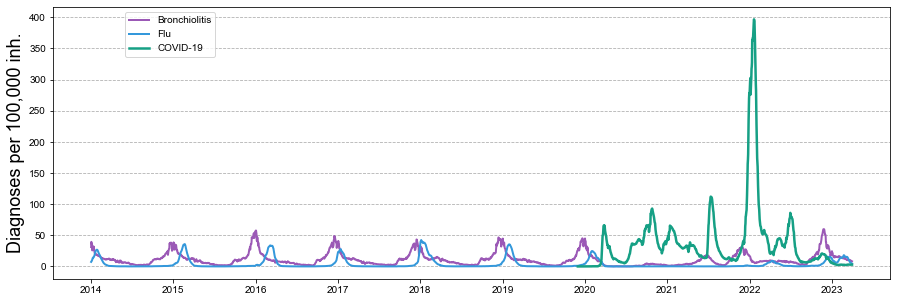

In [21]:
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})
st = datetime.date(2014,1,1); en = datetime.date(2023,4,1)
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(vri_ll['Bronquiolitis (<5 a.)'].loc[st:en], label = 'Bronchiolitis', color = '#9B59B6', linewidth = 2)
ax.plot(vri_ll['Grip (tothom)'].loc[st:en],label = 'Flu', color = '#3498DB', linewidth = 2)
ax.set_ylabel('Diagnoses per 100,000 inh.', fontsize = 18)
ax.grid(axis='y', linestyle='--')
ax.plot(vri_ll['COVID-19 (tothom)'].loc[st:en],color='#16A085', label = 'COVID-19', linewidth = 2.5)
ax.legend(bbox_to_anchor=(-0.3, 0.5, 0.5, 0.5))
#ax.set_xlim([datetime.date(2020,1,1),datetime.date(2023,3,1)])
plt.savefig('diagnoses_all.png', dpi=1200)

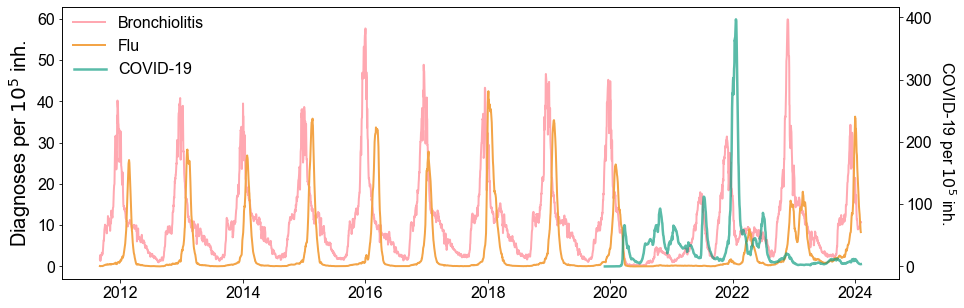

In [22]:
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(vri_ll['Bronquiolitis (<5 a.)'], label = 'Bronchiolitis', color = '#FF5364', linewidth = 2, alpha = .5)
ax.plot(vri_ll['Grip (tothom)'],label = 'Flu', color = '#F3A447', linewidth = 2)
ax.set_ylabel('Diagnoses per $10^5$ inh.', fontsize = 20)
#ax.grid(axis='y', linestyle='--')
ax2 = ax.twinx()
ax2.plot(vri_ll['COVID-19 (tothom)'],color='#149F84', label = 'COVID-19', linewidth = 2.5, alpha = .7)
ax2.set_ylabel('COVID-19 per $10^5$ inh.', rotation = 270, labelpad = 25)
#ax.set_xlim([datetime.date(2020,1,1),datetime.date(2023,3,1)])
ax.legend(bbox_to_anchor=(-0.313, 0.52, 0.5, 0.5),frameon = False)
ax2.legend(bbox_to_anchor=(-0.327, 0.35, 0.5, 0.5), frameon = False)
plt.savefig('triplemia.png', dpi=1200)

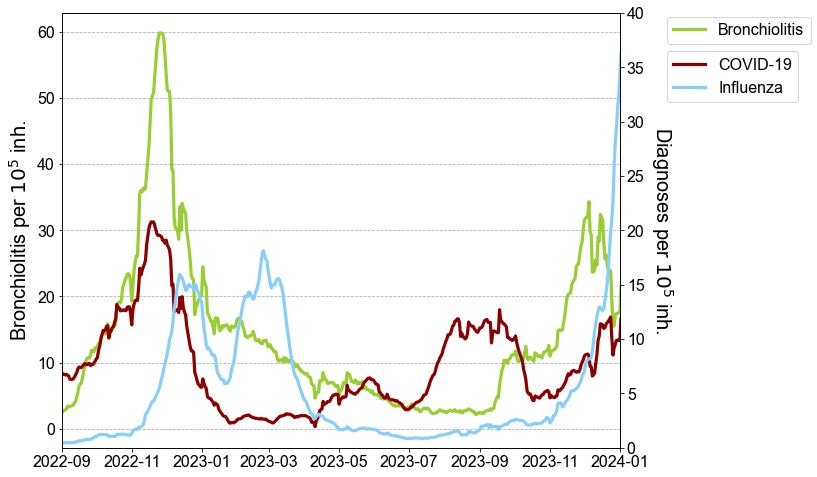

In [23]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(vri_ll.index,vri_ll['Bronquiolitis (<5 a.)'], label = 'Bronchiolitis', color = 'yellowgreen', linewidth = 3.2)
ax.set_xlim([datetime.date(2022,9,1),datetime.date(2024,1,1)])
ax.set_ylabel('Bronchiolitis per $10^5$ inh.', fontsize = 20)
ax2 = ax.twinx()
ax2.plot(vri_ll.index,vri_ll['COVID-19 (tothom)'],color='darkred', label = 'COVID-19', linewidth = 3.2)
ax2.plot(vri_ll.index,vri_ll['Grip (tothom)'],label = 'Influenza', color = 'lightskyblue', linewidth = 3.2)
ax2.set_ylabel('Diagnoses per $10^5$ inh.', fontsize = 20, rotation = 270, labelpad = 30)
ax2.set_ylim((0,40))
ax.grid(axis='y', linestyle='--')
#ax.set_xticklabels(['Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023'], rotation=45)  # Set rotation angle
ax.legend(loc = 'upper left', bbox_to_anchor=(1.07, .51, 0.5, 0.5))
ax2.legend(loc = 'upper left', bbox_to_anchor=(1.07, 0.43, 0.5, 0.5))

In [24]:
datss

,data,MITJANAC19,CILC19,CIHC19,MITJANAG,CILG,CIHG,MITJANAV,CILV,CIHV
0,2022-10-03,70,51,88,32,19,45,9,2,16
1,2022-10-10,73,53,93,36,22,51,13,4,22
2,2022-10-17,82,62,102,29,17,42,19,9,29
3,2022-10-24,82,62,101,40,26,54,33,20,46
4,2022-10-31,85,61,109,37,21,54,77,54,100
5,2022-11-07,137,111,163,53,36,71,69,50,89
6,2022-11-14,154,125,183,118,92,144,97,73,120
7,2022-11-21,154,123,184,144,115,174,127,99,155
8,2022-11-28,156,123,188,220,183,257,145,114,177
9,2022-12-05,87,60,114,230,191,269,97,69,125


C:\Users\A. Perramon Malavez\AppData\Local\Temp\ipykernel_22412\4183545194.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023'], rotation=45)  # Set rotation angle


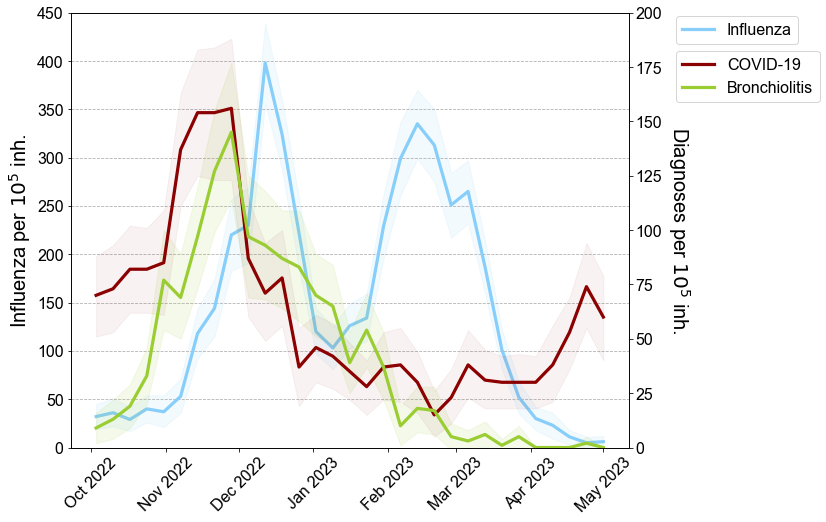

In [25]:
import matplotlib.pyplot as plt
import datetime

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Bronchiolitis
ax.plot(datss['data'], datss['MITJANAG'], label='Influenza', color='lightskyblue', linewidth=3.2)
ax.set_ylim((0, 450))
# Set the x-axis limits
#ax.set_xlim([datetime.date(2022, 10, 3), datetime.date(2023, 5, 1)])

# Set the y-axis label for Bronchiolitis
ax.set_ylabel('Influenza per $10^5$ inh.', fontsize=20)

# Create a twin axes for the second y-axis
ax2 = ax.twinx()

# Plot COVID-19 and Influenza
ax2.plot(datss['data'], datss['MITJANAC19'], color='darkred', label='COVID-19', linewidth=3.2)
ax2.plot(datss['data'], datss['MITJANAV'], label='Bronchiolitis', color='yellowgreen', linewidth=3.2)
# Set the y-axis label for COVID-19 and Influenza
ax2.set_ylabel('Diagnoses per $10^5$ inh.', fontsize=20, rotation=270, labelpad=30)

# Set the y-axis limits for COVID-19 and Influenza
ax2.set_ylim((0, 200))

# Add confidence intervals as shadows
ax2.fill_between(datss['data'], datss['CILV'], datss['CIHV'], color='yellowgreen', alpha=0.1)
ax2.fill_between(datss['data'], datss['CILC19'], datss['CIHC19'], color='darkred', alpha=0.05)
ax.fill_between(datss['data'], datss['CILG'], datss['CIHG'], color='lightskyblue', alpha=0.1)

# Add gridlines on the y-axis
ax.grid(axis='y', linestyle='--')
ax.set_xticklabels(['Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023'], rotation=45)  # Set rotation angle


# Add legends
ax.legend(loc='upper left', bbox_to_anchor=(1.07, .51, 0.5, 0.5))
ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 0.43, 0.5, 0.5))

# Display the plot
plt.show()


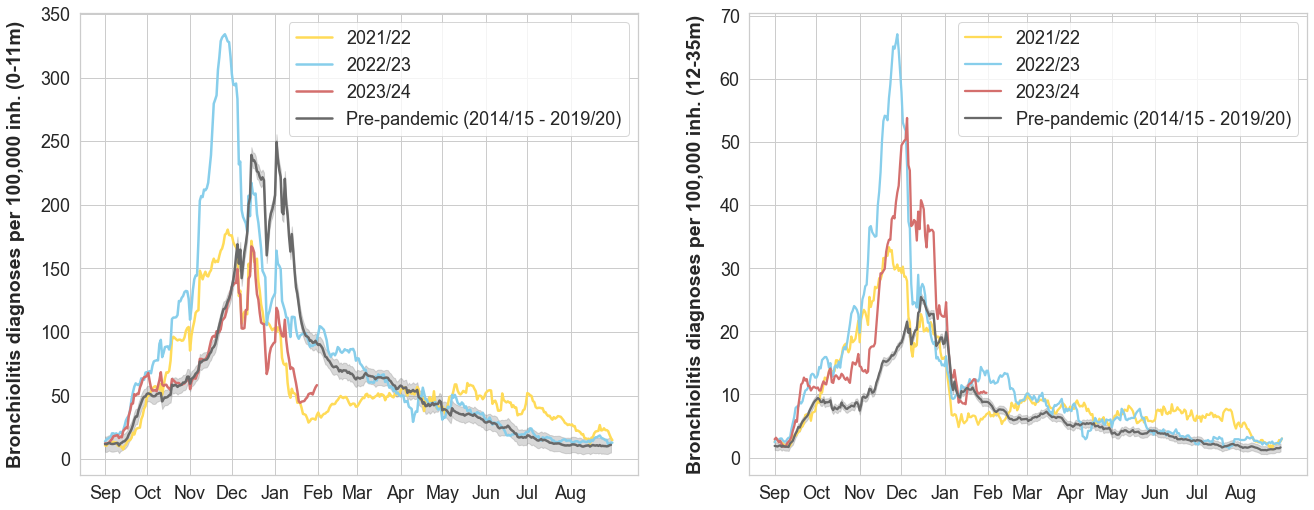

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Set custom font style
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# Set a seaborn style
sns.set(style="whitegrid")

# Create a custom color palette

tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

data = vri_ll['Bronquiolitis (0 a.)']
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(22, 8.5))

date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-08-31'),
               ('2023-09-01', '2024-02-06')]

palette = sns.color_palette("Pastel1", len(date_ranges) - 1)
# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))

# Plotting for bronquiolitis 0-1 year old (left subplot)
ax[0].plot(np.arange(365), data.loc['2021-09-01':'2022-08-31'], label='2021/22', color='#FFDB58', linewidth = 2.5)
ax[0].plot(np.arange(365), data.loc['2022-09-01':'2023-08-31'], label='2022/23', color='#87CEEB', linewidth = 2.5)
ax[0].plot(np.arange(153), data.loc['2023-09-01':'2024-01-31'], label='2023/24', color='#D46F6D', linewidth = 2.5)

ax[0].plot(pre_pandemic_mean, label='Pre-pandemic (2014/15 - 2019/20)', color='dimgrey', linewidth = 2.5)
ax[0].fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0], pre_pandemic_ci[1], alpha=0.3, color='grey')

ax[0].set_ylabel('Bronchiolitis diagnoses per 100,000 inh. (0-11m)', fontsize=19.5,fontweight = "bold", labelpad = 15)
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels(tick_labels, fontsize = 18)
ax[0].legend(fontsize = 18)

data = vri_ll['Bronquiolitis (1-2 a.)']
date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-08-31'),
               ('2023-09-01', '2024-01-31')]

# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))
# Plotting for bronquiolitis 1-2 years old (right subplot)
ax[1].plot(np.arange(365), data.loc['2021-09-01':'2022-08-31'], label='2021/22', color='#FFDB58', linewidth = 2.3)
ax[1].plot(np.arange(365), data.loc['2022-09-01':'2023-08-31'], label='2022/23', color='#87CEEB', linewidth = 2.3)
ax[1].plot(np.arange(153), data.loc['2023-09-01':'2024-01-31'], label='2023/24', color='#D46F6D', linewidth = 2.3)

ax[1].plot(pre_pandemic_mean, label='Pre-pandemic (2014/15 - 2019/20)', color='dimgrey', linewidth = 2.3)
ax[1].fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0], pre_pandemic_ci[1], alpha=0.3, color='grey')

ax[1].set_ylabel('Bronchiolitis diagnoses per 100,000 inh. (12-35m)', fontsize=19.5, fontweight = "bold", labelpad = 15)
ax[1].set_xticks(tick_positions)
ax[1].set_xticklabels(tick_labels, fontsize = 18)
ax[1].legend(fontsize = 18)

# Adjust y-axis tick font
for axis in ax:
    axis.tick_params(axis='y', labelsize=18)
    
# Save or display the plot
plt.savefig(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\Congressos\ESPID2024\Bronquiolitis.png', dpi = 600, format = "png")
plt.show()


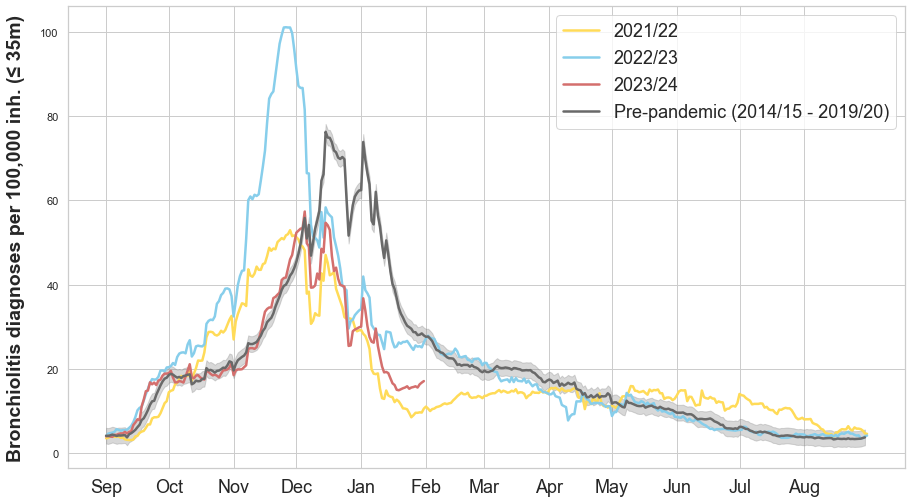

In [29]:
import numpy as np
from scipy.stats import norm

# Set custom font style
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# Set a seaborn style
sns.set(style="whitegrid")

# Create a custom color palette

tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

data = vri_ll['Bronquiolitis (<2 a.)']
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 8.5))

date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-08-31'),
               ('2023-09-01', '2024-02-06')]

palette = sns.color_palette("Pastel1", len(date_ranges) - 1)
# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))

# Plotting for bronquiolitis 0-1 year old (left subplot)
plt.plot(np.arange(365), data.loc['2021-09-01':'2022-08-31'], label='2021/22', color='#FFDB58', linewidth = 2.5)
plt.plot(np.arange(365), data.loc['2022-09-01':'2023-08-31'], label='2022/23', color='#87CEEB', linewidth = 2.5)
plt.plot(np.arange(153), data.loc['2023-09-01':'2024-01-31'], label='2023/24', color='#D46F6D', linewidth = 2.5)

plt.plot(pre_pandemic_mean, label='Pre-pandemic (2014/15 - 2019/20)', color='dimgrey', linewidth = 2.5)
plt.fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0], pre_pandemic_ci[1], alpha=0.3, color='grey')

plt.ylabel('Bronchiolitis diagnoses per 100,000 inh. (≤ 35m)', fontsize=19.5,fontweight = "bold", labelpad = 15)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize = 18)
plt.legend(fontsize = 18)

plt.savefig(r'C:\Users\A. Perramon Malavez\OneDrive - Universitat Politècnica de Catalunya\Escritorio\BIOCOM-SC\Congressos\ESPID2024\Bronquiolitis_02a.png', dpi = 600, format = "png")
plt.show()

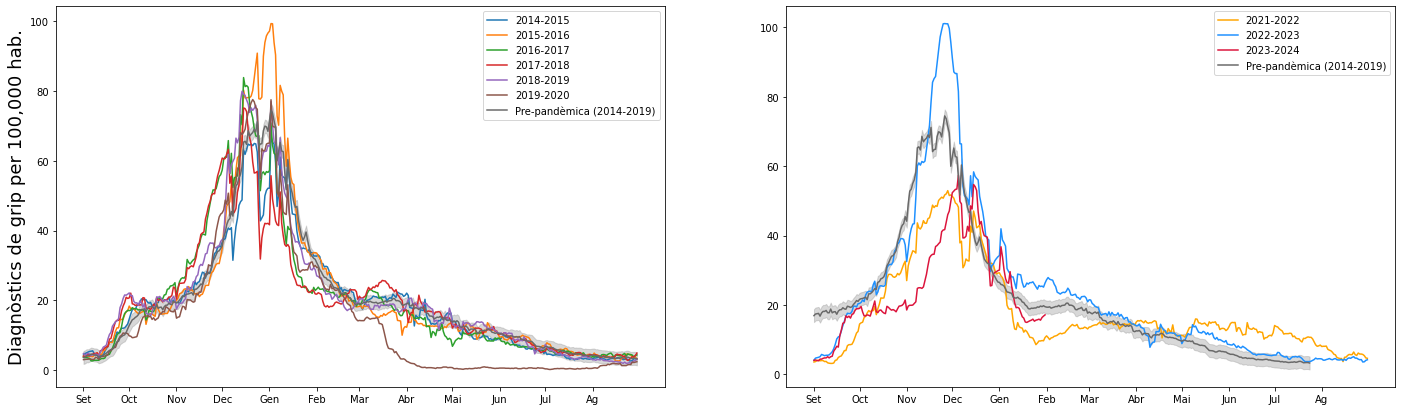

In [21]:
from scipy.stats import norm
# load data
data = vri_ll['Bronquiolitis (<2 a.)']

# define the date range for each year
date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-08-31'),
               ('2023-09-01', '2024-02-06')]

# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
#pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
#pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
#pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))

from scipy.signal import correlate
from scipy.stats import norm

# Assuming save_prepandemic is your matrix where each column is a time series
# Calculate the cross-correlation with the first time series as the reference
reference_series = pre_pandemic_data[0]

# Function to find the lag that maximizes cross-correlation
def find_lag(reference, series):
    cross_corr = correlate(reference, series, mode='full')
    lag = np.argmax(cross_corr) - len(series) + 1
    return lag

# Align all time series based on the lag
aligned_data = np.zeros_like(pre_pandemic_data)
for i in range(np.shape(pre_pandemic_data)[0]):
    lag = find_lag(reference_series, pre_pandemic_data[i])
    aligned_data[i] = np.roll(pre_pandemic_data[i], lag)

# Calculate mean and standard deviation
pre_pandemic_mean_aligned = np.mean(aligned_data, axis=0)
pre_pandemic_std_aligned = np.std(aligned_data, ddof=1)

# Calculate confidence interval
pre_pandemic_ci_aligned = norm.interval(0.95, loc=pre_pandemic_mean_aligned, scale=pre_pandemic_std_aligned / np.sqrt(len(pre_pandemic_mean_aligned)))

tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Set', 'Oct', 'Nov', 'Dec','Gen', 'Feb', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ag']

# plot the data and pre-pandemic mean
fig, ax = plt.subplots(1,2,figsize=(24, 7))
#ax.plot(np.arange(366),data.loc['2015-09-01':'2016-08-31'], label='2015-2016', color = '#006400')
#ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'], label='2019-2020', color = '#1E90FF')
#ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'], label='2020-2021', color = '#FFA500')
ax[0].plot(np.arange(364), save_prepandemic[0], label = '2014-2015')
ax[0].plot(np.arange(364), save_prepandemic[1], label = '2015-2016')
ax[0].plot(np.arange(364), save_prepandemic[2], label = '2016-2017')
ax[0].plot(np.arange(364), save_prepandemic[3], label = '2017-2018')
ax[0].plot(np.arange(364), save_prepandemic[4], label = '2018-2019')
ax[0].plot(np.arange(364), save_prepandemic[5], label = '2019-2020')
ax[0].plot(pre_pandemic_mean_aligned, label='Pre-pandèmica (2014-2019)', color = 'dimgrey')
ax[0].fill_between(np.arange(len(pre_pandemic_mean_aligned)),pre_pandemic_ci_aligned[0], pre_pandemic_ci_aligned[1], alpha=0.3, color = 'grey')
ax[0].set_ylabel('Diagnòstics de grip per 100,000 hab.', fontsize = 18)
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels(tick_labels)
ax[0].legend()

ax[1].plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'], label='2021-2022', color = '#FFA500')
ax[1].plot(np.arange(365),data.loc['2022-09-01':'2023-08-31'], label='2022-2023', color = '#1E90FF')
ax[1].plot(np.arange(153),data.loc['2023-09-01':'2024-01-31'], label='2023-2024', color = 'crimson')
ax[1].plot(pre_pandemic_mean_aligned[37:], label='Pre-pandèmica (2014-2019)', color = 'dimgrey')
ax[1].fill_between(np.arange(len(pre_pandemic_mean_aligned[37:])),pre_pandemic_ci_aligned[0][37:], pre_pandemic_ci_aligned[1][37:], alpha=0.3, color = 'grey')
#ax[1].set_ylabel('Influenza diagnoses per 100,000 inh.', fontsize = 18)

ax[1].set_xticks(tick_positions)
ax[1].set_xticklabels(tick_labels)
ax[1].legend()
#plt.savefig('bronchiolitis_daily_clara.png', dpi=600)

#fig, ax = plt.subplots(figsize=(12, 6))
#plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

#ax.plot(np.arange(366),data.loc['2015-09-01':'2016-08-31'].cumsum(), label='2015-2016', color = '#006400')
#ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'].cumsum(), label='2019-2020', color = '#1E90FF')
#ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'].cumsum(), label='2020-2021', color = '#FFA500')
#ax.plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'].cumsum(), label='2021-2022', color = '#DC143C')
#ax.plot(np.arange(211),data.loc['2022-09-01':'2023-03-30'].cumsum(), label='2022-2023', color = '#DDA0DD')
#ax.plot(np.cumsum(pre_pandemic_mean), label='Pre-pandemic (2014-2019)', color = 'dimgrey')
#ax.fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0].cumsum(), pre_pandemic_ci[1].cumsum(), alpha=0.3, color = 'grey')
#ax.set_ylabel('Cumulative bronchiolitis per 100,000 inh.', fontsize = 18)
#tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
#tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
#ax.set_xticks(tick_positions)
#ax.set_xticklabels(tick_labels)
#ax.legend()
#plt.savefig('bronchiolitis_cumulative.png', dpi=1200)

ValueError: x and y must have same first dimension, but have shapes (147,) and (148,)

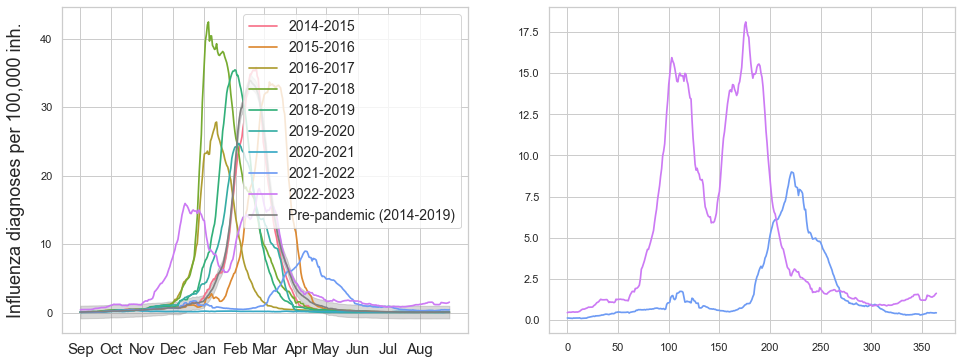

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import correlate

# Set custom font style
font = {'family': 'Arial', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

# Set a seaborn style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette("husl", len(date_ranges))
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotting for the first subplot
for i in range(len(date_ranges) - 1):
    ax[0].plot(np.arange(364), save_prepandemic[i], label=f'{date_ranges[i][0][:4]}-{date_ranges[i][1][:4]}',
               color=palette[i], linewidth = 1.7)

ax[0].plot(pre_pandemic_mean_aligned, label='Pre-pandemic (2014-2019)', color='grey', linewidth = 1.7)
ax[0].fill_between(np.arange(len(pre_pandemic_mean_aligned)), pre_pandemic_ci_aligned[0],
                   pre_pandemic_ci_aligned[1], alpha=0.3, color='grey')

ax[0].set_ylabel('Influenza diagnoses per 100,000 inh.', fontsize=18, labelpad = 15)
ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels(tick_labels, fontsize = 15)
ax[0].legend(fontsize = 14)

# Plotting for the second subplot
ax[1].plot(np.arange(365), data.loc['2021-09-01':'2022-08-31'], label='2021-2022', color=palette[-3], linewidth = 1.7)
ax[1].plot(np.arange(365), data.loc['2022-09-01':'2023-08-31'], label='2022-2023', color=palette[-2], linewidth = 1.7)
ax[1].plot(np.arange(147), data.loc['2023-09-01':'2024-01-26'], label='2023-2024', color=palette[-1], linewidth = 1.7)

ax[1].plot(pre_pandemic_mean_aligned[37:], label=' Pre-pandemic (2014-2019)\n displaced', color='grey', linewidth = 1.5)
ax[1].fill_between(np.arange(len(pre_pandemic_mean_aligned[37:])), pre_pandemic_ci_aligned[0][37:],
                   pre_pandemic_ci_aligned[1][37:], alpha=0.3, color='grey')

ax[1].set_xticks(tick_positions)
ax[1].set_xticklabels(tick_labels, fontsize = 15)
ax[1].legend(fontsize = 14)

# Adjust y-axis tick font
for axis in ax:
    axis.tick_params(axis='y', labelsize=14)
    
# Adjusting layout
plt.tight_layout()

# Save or display the plot
plt.savefig('figura_verificat.png', dpi=1200)
plt.show()


In [ ]:
np.shape(pre_pandemic_data)

In [ ]:
.

In [ ]:
ind1 = np.argmax(vri_ll['Bronquiolitis (<5 a.)'].loc['2015-09-01':'2016-08-31'])
ind2 = np.argmax(vri_ll['Bronquiolitis (<5 a.)'].loc['2022-09-01':'2023-04-01'])
print(ind1, ind2, ind2-ind1)

In [ ]:
from scipy.stats import norm
# load data
data = vri_ll['Grip (<15 a.)']

# define the date range for each year
date_ranges = [('2014-09-01', '2015-08-31'),
               ('2015-09-01', '2016-08-31'),
               ('2016-09-01', '2017-08-31'),
               ('2017-09-01', '2018-08-31'),
               ('2018-09-01', '2019-08-31'),
               ('2019-09-01', '2020-08-31'),
               ('2020-09-01', '2021-08-31'),
               ('2021-09-01', '2022-08-31'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
means = []
stds = []
save_prepandemic = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    mean = year_data.values.mean()
    std = year_data.values.std(ddof=1)
    means.append(mean)
    stds.append(std)
    save_prepandemic.append(year_data.values[0:364])

# compute the pre-pandemic mean and standard deviation
pre_pandemic_data = save_prepandemic[0:5]
pre_pandemic_mean = np.mean(pre_pandemic_data,axis=0)
pre_pandemic_std = np.std(pre_pandemic_data,ddof=1)
pre_pandemic_ci = norm.interval(0.95, loc=pre_pandemic_mean, scale=pre_pandemic_std / np.sqrt(len(pre_pandemic_mean)))

# plot the data and pre-pandemic mean
fig, ax = plt.subplots(figsize=(12, 6))
#ax.plot(np.arange(365),data.loc['2017-09-01':'2018-08-31'], label='2017-2018', color = '#006400')
#ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'], label='2019-2020', color = '#1E90FF')
#ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'], label='2020-2021', color = '#FFA500')
ax.plot(np.arange(365),data.loc['2022-09-01':'2023-08-31'], label='2021-2022', color = '#DC143C')
ax.plot(np.arange(46),data.loc['2023-09-01':'2023-10-16'], label='2022-2023', color = 'cornflowerblue')
ax.plot(pre_pandemic_mean, label='Pre-pandemic (2014-2019)', color = 'dimgrey')
ax.fill_between(np.arange(len(pre_pandemic_mean)),pre_pandemic_ci[0], pre_pandemic_ci[1], alpha=0.3, color = 'grey')
ax.set_ylabel('Flu diagnoses per 100,000 inh.', fontsize = 20)
tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.legend()
#plt.savefig('influenza_daily.png', dpi=1200)

fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})

ax.plot(np.arange(365),data.loc['2017-09-01':'2018-08-31'].cumsum(), label='2017-2018', color = '#006400')
ax.plot(np.arange(366),data.loc['2019-09-01':'2020-08-31'].cumsum(), label='2019-2020', color = '#1E90FF')
ax.plot(np.arange(365),data.loc['2020-09-01':'2021-08-31'].cumsum(), label='2020-2021', color = '#FFA500')
ax.plot(np.arange(365),data.loc['2021-09-01':'2022-08-31'].cumsum(), label='2021-2022', color = '#DC143C')
ax.plot(np.arange(211),data.loc['2022-09-01':'2023-03-30'].cumsum(), label='2022-2023', color = '#DDA0DD')
ax.plot(np.cumsum(pre_pandemic_mean), label='Pre-pandemic (2014-2019)', color = 'dimgrey')
ax.fill_between(np.arange(len(pre_pandemic_mean)), pre_pandemic_ci[0].cumsum(), pre_pandemic_ci[1].cumsum(), alpha=0.3, color = 'grey')
ax.set_ylabel('Cumulative flu diagnoses per 100,000 inh.', fontsize = 18)
tick_positions = [0,30,61,91,122,153,181,212,242,273,303,334]
tick_labels = ['Sep', 'Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.legend()
#plt.savefig('influenza_cumulative.png', dpi=1200)

In [ ]:
ind1 = np.argmax(vri_ll['Grip (tothom)'].loc['2022-09-01':'2023-02-01'])
ind2 = np.argmax(pre_pandemic_mean)
print(ind1, ind2, ind2-ind1)

In [ ]:
freq = 'W-MON'
inc_sars_setm = inc_sarscov2_tot.resample(freq).sum()
inc_sars0_setm = inc_sarscov2_0.resample(freq).sum()
inc_sars12_setm = inc_sarscov2_12.resample(freq).sum()
inc_sars34_setm = inc_sarscov2_34.resample(freq).sum()
inc_sars514_setm = inc_sarscov2_514.resample(freq).sum()
inc_sarspedia_setm = inc_sarscov2_pedia.resample(freq).sum()
inc_bronqui_setm = inc_bronquiolitis_tot.resample(freq).sum()
inc_bronqui0_setm = inc_bronquiolitis_0.resample(freq).sum()
inc_bronqui12_setm = inc_bronquiolitis_12.resample(freq).sum()
inc_bronqui34_setm = inc_bronquiolitis_34.resample(freq).sum()
inc_bronquipedia4_setm = inc_bronquiolitis_pedia4.resample(freq).sum()
inc_influ_setm = inc_influenza_tot.resample(freq).sum()
inc_influ0_setm = inc_influenza_0.resample(freq).sum()
inc_influ12_setm = inc_influenza_12.resample(freq).sum()
inc_influ34_setm = inc_influenza_34.resample(freq).sum()
inc_influ514_setm = inc_influenza_514.resample(freq).sum()
inc_influpedia_setm = inc_influenza_pedia.resample(freq).sum()

In [ ]:
import seaborn as sns

# define the date range for each year
data = inc_bronquipedia4_setm

date_ranges = [('2014-09-01', '2015-04-01'),
               ('2015-09-01', '2016-04-01'),
               ('2016-09-01', '2017-04-01'),
               ('2017-09-01', '2018-04-01'),
               ('2018-09-01', '2019-04-01'),
               ('2019-09-01', '2020-04-01'),               
               ('2020-09-01', '2021-04-01'),
               ('2021-09-01', '2022-04-01'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
data_list = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    data_list.append(year_data.values)

# plot the boxplot with Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle('Weekly incidence of bronchiolitis (MM7, Sep-Mar)', y=0.93)
sns.boxplot(data=data_list, palette='colorblind', ax=ax, fliersize=7, linewidth=2, notch=False)
ax.set_xticklabels([f'{start_date[:4]}-{end_date[:4]}' for start_date, end_date in date_ranges])
ax.set_ylabel('Bronchiolitis diagnoses per 100,000 inh.', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout() # Add this line
plt.savefig('boxplot_bronquiolitis.png', dpi=1200)
plt.show()


In [ ]:
# define the date range for each year
data = inc_influ_setm

date_ranges = [('2014-09-01', '2015-04-01'),
               ('2015-09-01', '2016-04-01'),
               ('2016-09-01', '2017-04-01'),
               ('2017-09-01', '2018-04-01'),
               ('2018-09-01', '2019-04-01'),
               ('2019-09-01', '2020-04-01'),               
               ('2020-09-01', '2021-04-01'),
               ('2021-09-01', '2022-04-01'),
               ('2022-09-01', '2023-04-01')]

# compute means and standard deviations for each year
data_list = []
for start_date, end_date in date_ranges:
    year_data = data.loc[start_date:end_date]
    data_list.append(year_data.values)

# plot the boxplot with Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle('Weekly incidence of flu (MM7, Sep-Mar)', y=0.93)
sns.boxplot(data=data_list, palette='colorblind', ax=ax, fliersize=7, linewidth=2, notch=False)
ax.set_xticklabels([f'{start_date[:4]}-{end_date[:4]}' for start_date, end_date in date_ranges])
ax.set_ylabel('Flu diagnoses per 100,000 inh.', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout() # Add this line
plt.savefig('boxplot_flu.png', dpi=1200)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data
data1 = cvri['Bronquiolitis (<5 a.)']
data2 = cvri['Grip (tothom)']

# Define the date ranges
date_ranges_i = [
    ('2014-09-01', '2015-08-31', '2014-2015', '#C8E6C9'),
    ('2015-09-01', '2016-08-31', '2015-2016', '#A5D6A7'),
    ('2016-09-01', '2017-08-31', '2016-2017', '#81C784'),
    ('2017-09-01', '2018-08-31', '2017-2018', '#66BB6A'),
    ('2018-09-01', '2019-08-31', '2018-2019', '#4CAF50'),
    ('2019-09-01', '2020-08-31', '2019-2020', '#43A047'),
    ('2020-09-01', '2021-08-31', '2020-2021', '#388E3C'),
    ('2021-09-01', '2022-08-31', '2021-2022', '#2E7D32'),
    ('2022-09-01', '2023-03-30', '2022-2023', '#1B5E20')
]
date_ranges_b = [
    ('2014-09-01', '2015-08-31', '2014-2015', '#D1DFFF'),
    ('2015-09-01', '2016-08-31', '2015-2016', '#ADD8E6'),
    ('2016-09-01', '2017-08-31', '2016-2017', '#87CEEB'),
    ('2017-09-01', '2018-08-31', '2017-2018', '#00BFFF'),
    ('2018-09-01', '2019-08-31', '2018-2019', '#1E90FF'),
    ('2019-09-01', '2020-08-31', '2019-2020', '#4169E1'),
    ('2020-09-01', '2021-08-31', '2020-2021', '#0000CD'),
    ('2021-09-01', '2022-08-31', '2021-2022', '#00008B'),
    ('2022-09-01', '2023-03-30', '2022-2023', '#000080')
]
pre_pandemic_mean = np.random.randn(1825)
pre_pandemic_ci = [pre_pandemic_mean - 1, pre_pandemic_mean + 1]

# Create the figure and axes
fig, ax = plt.subplots(1,2,figsize=(15, 5))

# Plot the data and confidence intervals
count = 1
for start_date, end_date, xval, color in date_ranges_i:
    subset = data2.loc[start_date:end_date].cumsum()
    y = subset.iloc[-1]
    if count == 9:
        ax[0].plot(count, y, marker='o', color=color, label='Influenza')
    else:
        ax[0].plot(count, y, marker='o', color=color)
    count+=1
    
# Plot the data and confidence intervals
count = 1
for start_date, end_date, xval, color in date_ranges_b:
    subset = data1.loc[start_date:end_date].cumsum()
    y = subset.iloc[-1]
    if count == 9:
        ax[1].plot(count, y, marker='o', color=color, label='Bronchiolitis')
    else:
        ax[1].plot(count, y, marker='o', color=color)
    count+=1

ax[0].set_xticks(np.arange(1,len(date_ranges_i)+1))
ax[1].set_xticks(np.arange(1,len(date_ranges_i)+1))
ax[0].set_xticklabels([date_range[2] for date_range in date_ranges_i], rotation = 45)
ax[1].set_xticklabels([date_range[2] for date_range in date_ranges_b], rotation = 45)

# Add labels and legend
ax[0].set_xlabel('Season', fontsize = 18, labelpad = 10)
ax[1].set_xlabel('Season', fontsize = 18, labelpad = 10)
ax[0].set_ylabel('Final number of infected people', fontsize = 20, labelpad = 15)
ax[0].set_title('Influenza')
ax[1].set_title('Bronchiolitis')

ax[0].grid(axis='y', linestyle = '--', color = 'lightgray')
ax[1].grid(axis='y', linestyle = '--', color = 'lightgray')
plt.show()


In [ ]:
# Mortalitat
anys = np.arange(2014,2023)
perc_morts = [-1.863545628, 4.138302287, 1.449426298, -0.661972968, -0.120588541, -2.788410691, 19.87153528, 3.532252498, 5.491763356]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(anys, perc_morts, color='#4CAF50')

# Format plot
ax.axhline(y=0, color='grey', linestyle='--', lw=1)
ax.set_xlabel('Year')
ax.set_ylabel('% Difference from pre-pandemic MAD', fontsize = 18, labelpad = 15)
plt.figtext(0.16, 0.03, "MAD = Mean annual deaths", fontsize=12, ha="left")

plt.xticks(anys)
plt.show()

In [ ]:
#1. Load the data into a pandas DataFrame:

df = pd.read_excel("defuncions_catalunya.xlsx")

#2. Filter the data to only include the years 2017-2022:

df = df[df["data"].dt.year.between(2017, 2022)]

#3. Create a new column for the date in YYYY-MM format:

df["year_month"] = df["data"].dt.strftime("%Y-%m")

#4. Group the data by year_month, sex, and age group, and sum the cases column:

df_grouped = df.groupby(["year_month", "sexe", "grup_edat"])["casos"].sum().reset_index()


#5. Pivot the data to create separate columns for male and female deaths by age group:

df_pivoted = df_grouped.pivot(index="year_month", columns=["sexe", "grup_edat"], values="casos").fillna(0)

#6. Aggregate the data to create a single column for total deaths by year_month:

df_pivoted["total"] = df_pivoted.sum(axis=1)
print(df_pivoted)

#7. Create a new column for the year:

df_pivoted["year"] = df_pivoted.index.str[:4].astype(int)

#8. Create a new column for the month:

df_pivoted["month"] = df_pivoted.index.str[-2:].astype(int)

#9. Create a new column for the cumulative deaths:

df_pivoted["cumulative"] = df_pivoted.groupby("year")["total"].cumsum()


In [ ]:
import scipy.stats as stats
save_tempo=[]
for kk in np.arange(2017,2020):
    save_tempo.append(df_pivoted.loc[str(kk):str(kk+1), 'total'].values.cumsum())
# calculate mean and standard error of mean (SEM)
mean_prepandemic = np.mean(save_tempo,axis = 0)
sem_prepandemic = stats.sem(save_tempo, axis=0)

# calculate 95% confidence interval (CI) using t-distribution
n = np.shape(save_tempo)[0]
t_value = stats.t.ppf(1-0.05/2, n-1)
ci_prepandemic = t_value * sem_prepandemic

# print mean and confidence interval
print(f"Mean: {mean_prepandemic}")
print(f"95% CI: [{mean_prepandemic-ci_prepandemic}, {mean_prepandemic+ci_prepandemic}]")


In [ ]:
#10. Create a line plot showing the cumulative deaths per year:

fig, ax = plt.subplots(figsize = (15,8))

for year, group in df_pivoted.groupby("year"):
    ax.plot(group["month"], group["cumulative"], label=str(year))

# Add pre-pandemic mean to the plot
ax.plot(df_pivoted["month"][0:12],mean_prepandemic, color='gray', linestyle=':', label='Pre-pandemic mean')
ax.fill_between(df_pivoted["month"][0:12], mean_prepandemic+ci_prepandemic, mean_prepandemic-ci_prepandemic, color="lightgray", alpha=0.3)

ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1.0, 1.032))
ax.set_xlabel("Month", labelpad = 10, fontsize = 18)
ax.set_ylabel("Cumulative Deaths", labelpad = 15, fontsize = 18)

plt.show()


In [ ]:
# Export the df_pivot DataFrame to an Excel file
df_pivoted.to_excel("cumulative_deaths.xlsx")
